In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
movies = pd.read_csv('/home/jovyan/datasets/datasets/Movie-Ratings.csv')

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
len(movies)

559

In [8]:
len(movies.columns)

6

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.columns = ['Film', 'Genre', 'CriticRating','AudienceRating', 'BudgetMillions', \
                 'Year']

In [12]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movies.Film = movies.Film.astype('category')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 27.4+ KB


In [16]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [18]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [19]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

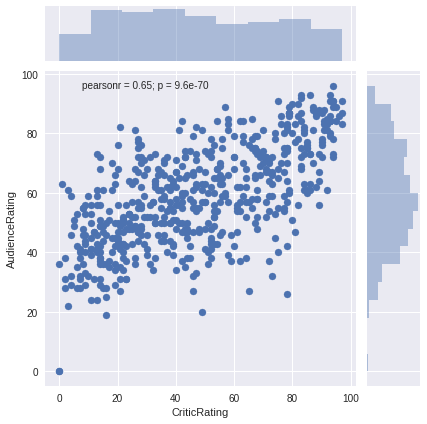

In [21]:
j = sns.jointplot(data = movies, x = 'CriticRating', y= 'AudienceRating')

---

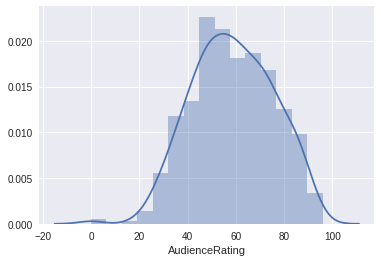

In [22]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

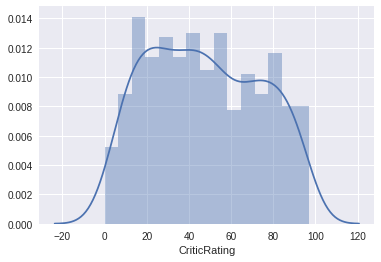

In [23]:
m2 = sns.distplot(movies.CriticRating, bins=15)

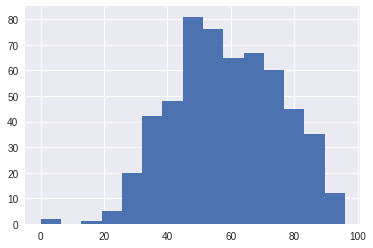

In [24]:
n1 = plt.hist(movies.AudienceRating, bins=15)

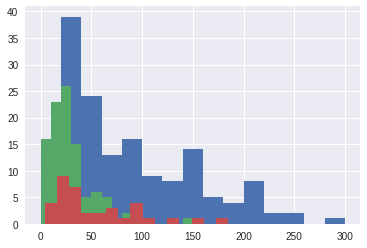

In [25]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

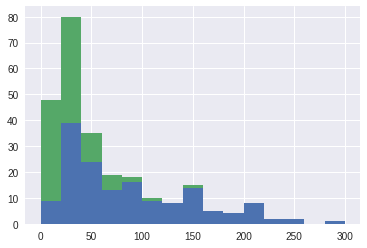

In [26]:
plt.hist([(movies[movies.Genre == 'Action'].BudgetMillions), movies[movies.Genre == 'Drama'].BudgetMillions], bins=15, stacked =True)
plt.show()

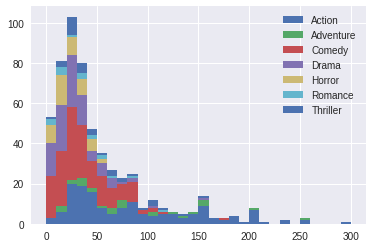

In [27]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

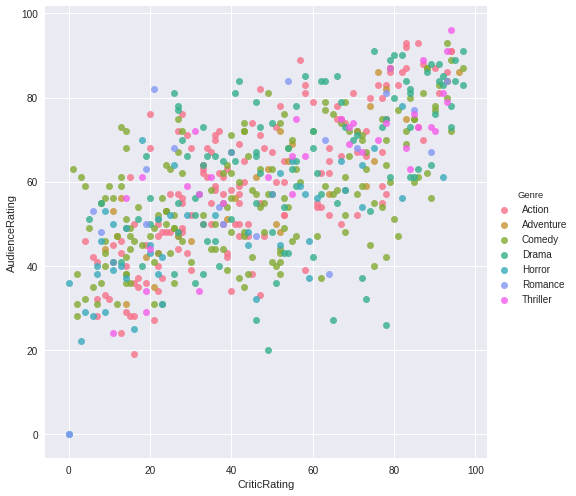

In [28]:
vis1 = sns.lmplot(data=movies, x = 'CriticRating', y = 'AudienceRating', \
                 fit_reg=False, hue='Genre', size=7, aspect=1)

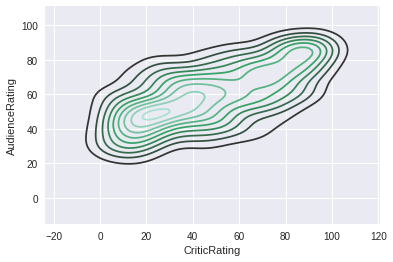

In [29]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

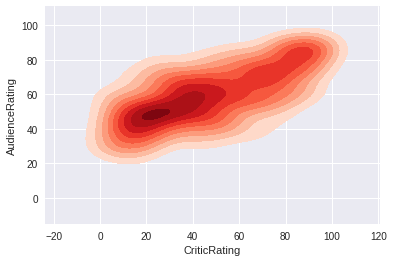

In [30]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap='Reds')

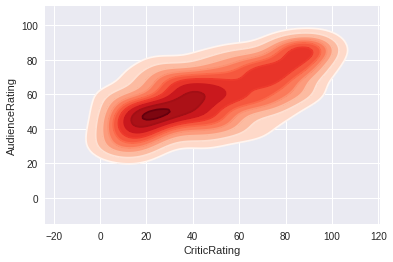

In [31]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

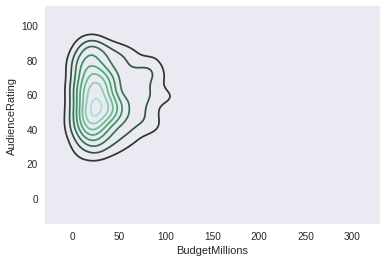

In [32]:
import seaborn as sns
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

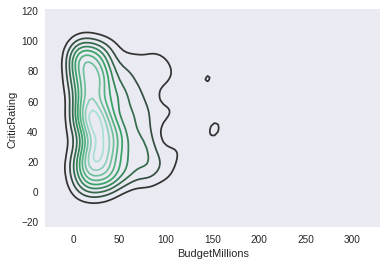

In [33]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

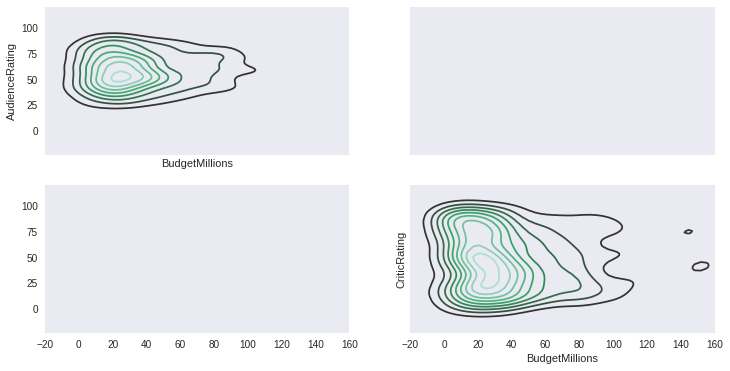

In [34]:
fig, axes = plt.subplots(2,2, figsize = (12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,1])
k1.set(xlim=(-20,160))

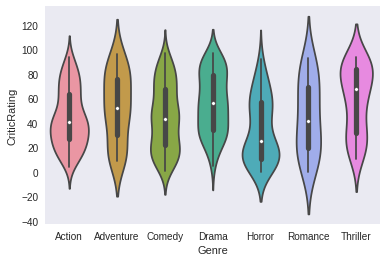

In [35]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

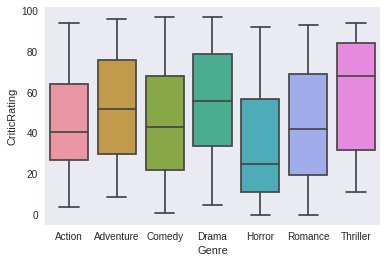

In [36]:
z1 = sns.boxplot(data=movies, x='Genre', y='CriticRating')

[(-40, 130)]

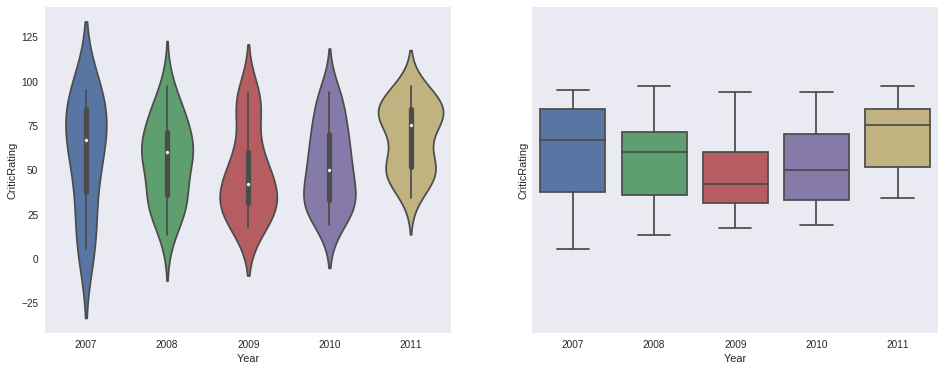

In [37]:
f, ax = plt.subplots(1,2, figsize=(16,6), sharex = True, sharey=True)
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[0])
z1 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[1])
k1.set(xlim=(-40, 130))

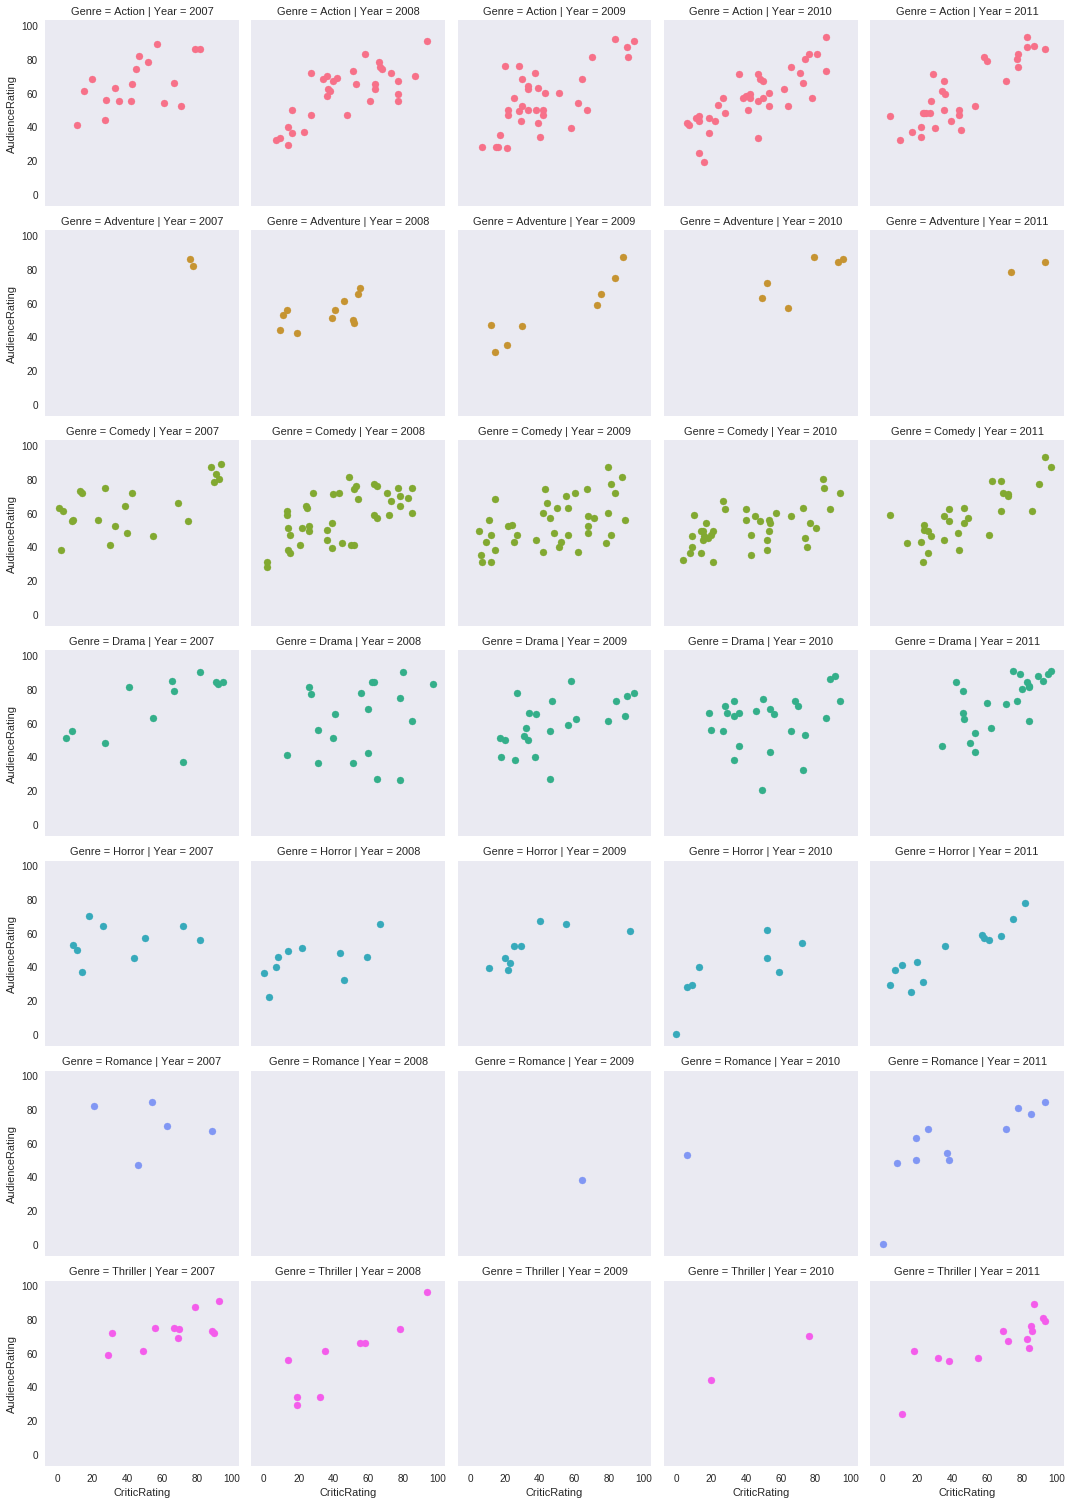

In [38]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

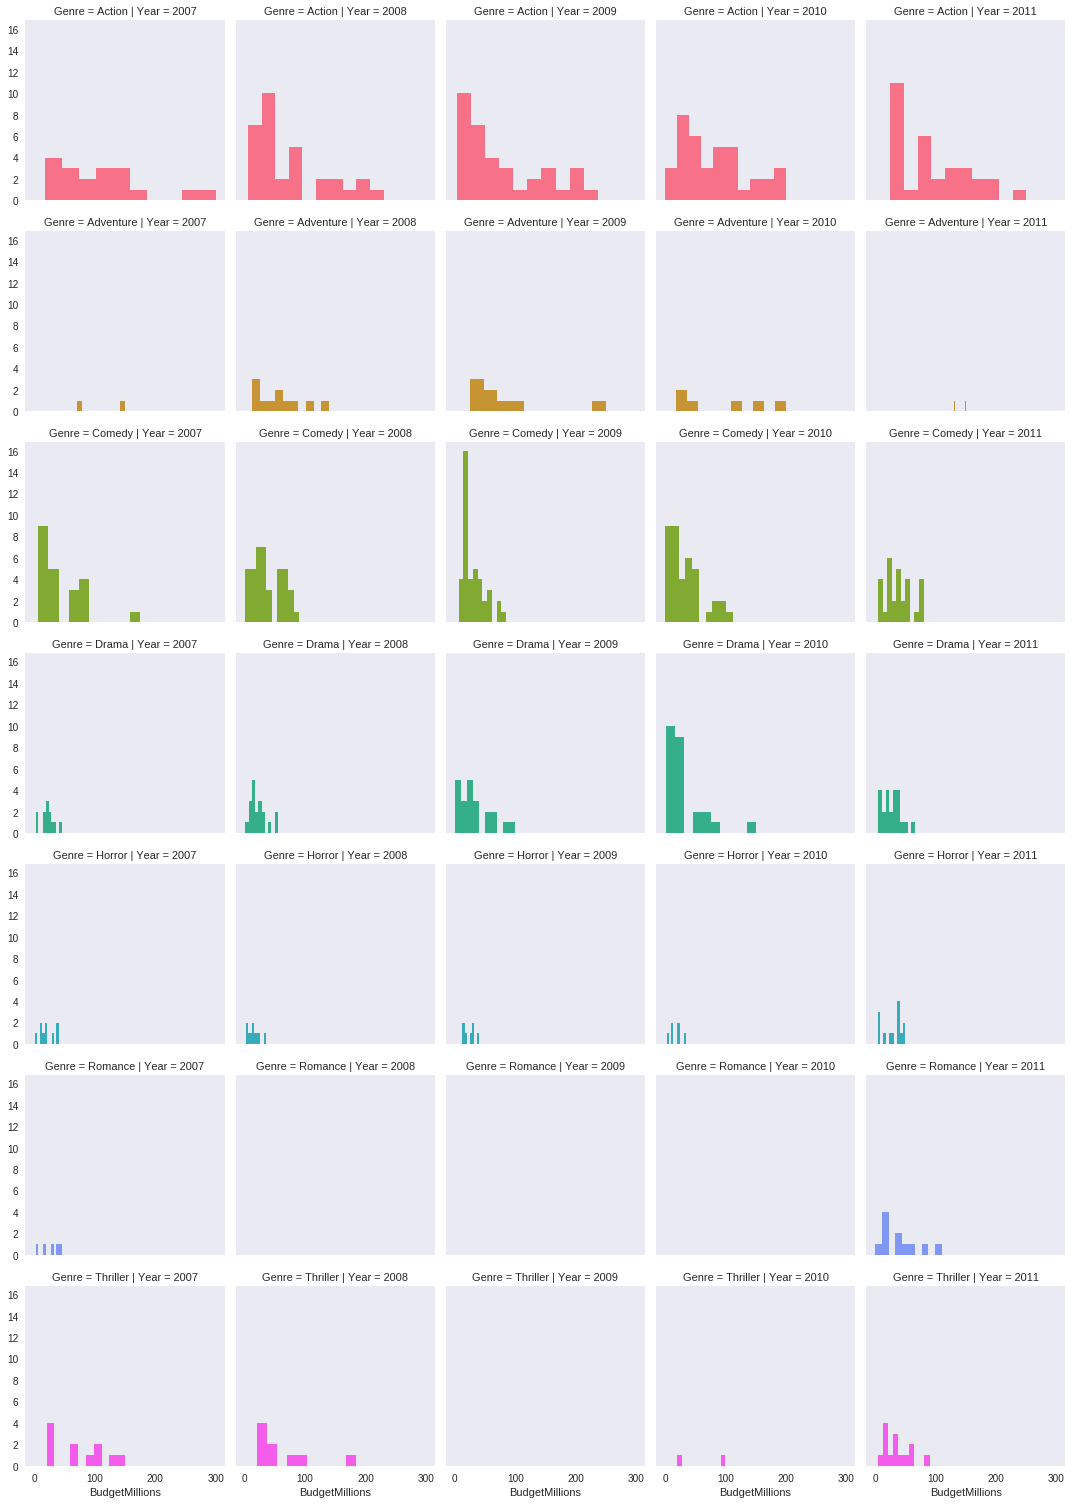

In [39]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

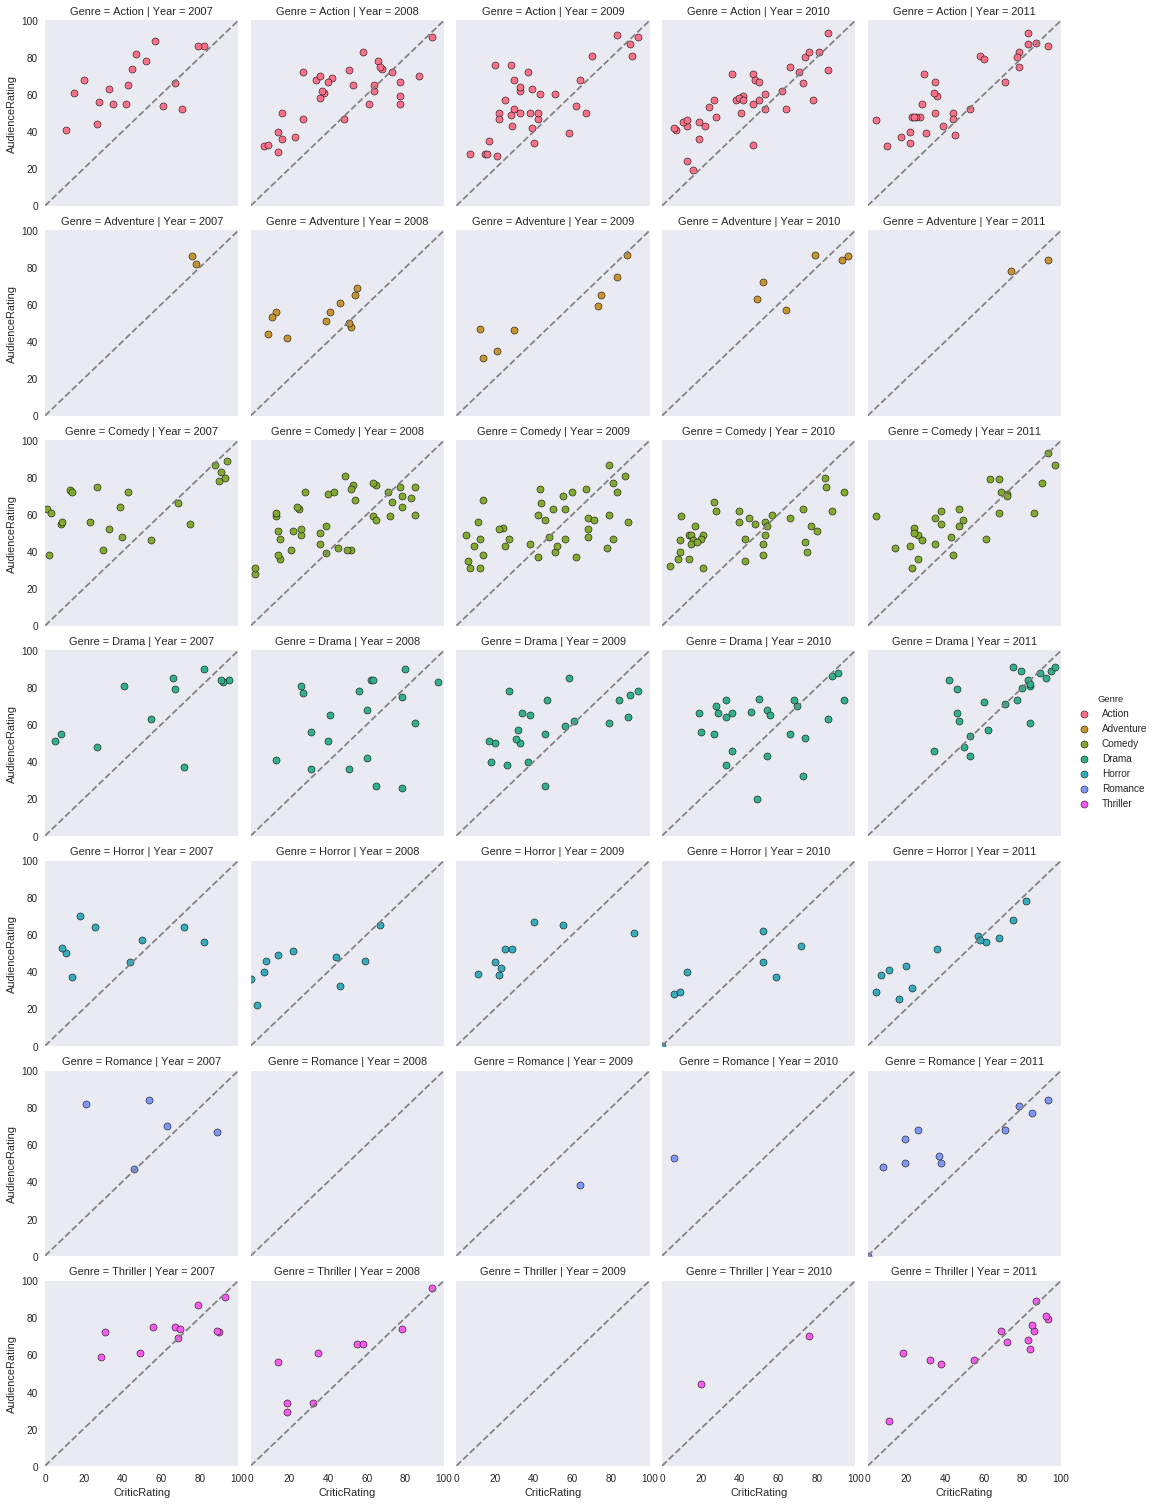

In [40]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="grey", ls="--")
g.add_legend()

##Building Dashboards

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings. filterwarnings('ignore')

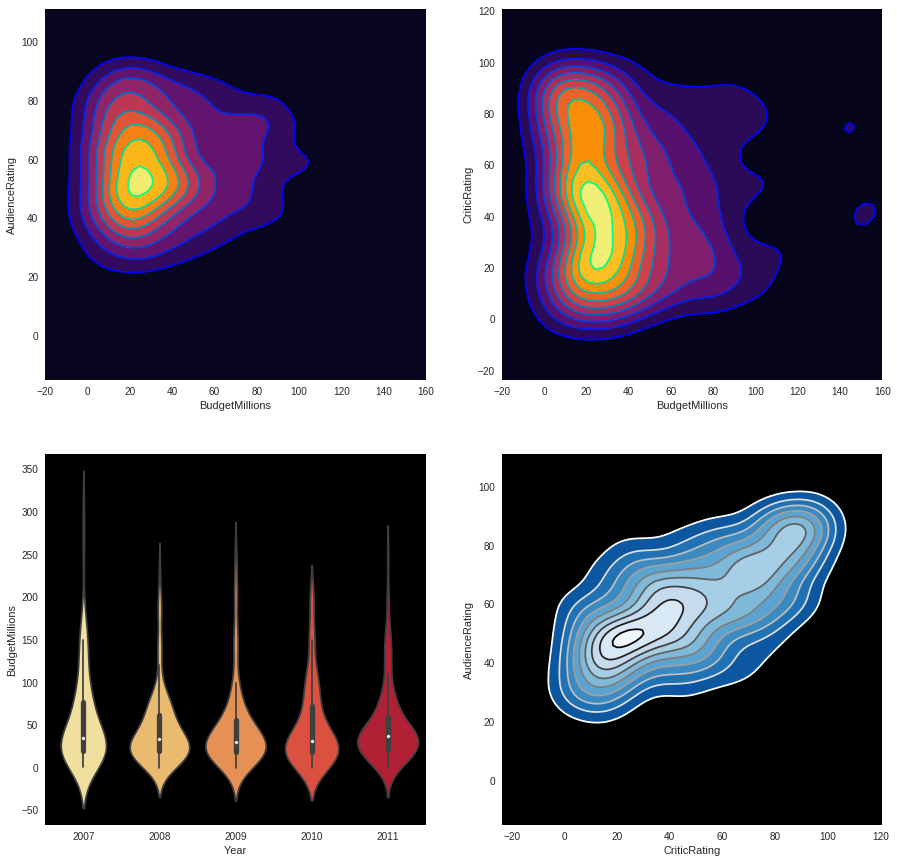

In [58]:
sns.set_style("dark",{"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize=(15,15))


#Plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 cmap='winter', ax=axes[0,0])

#Plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 cmap='winter', ax=axes[0,1])

#Plot[1,0]
z = sns.violinplot(data=movies, x='Year', y="BudgetMillions", \
                   palette='YlOrRd', \
                   ax=axes[1,0])

#Plot[1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='gist_gray_r', ax=axes[1,1])
#axes[1,1].hist(movies.CriticRating, bins=15)



k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()


#Thematic Edits

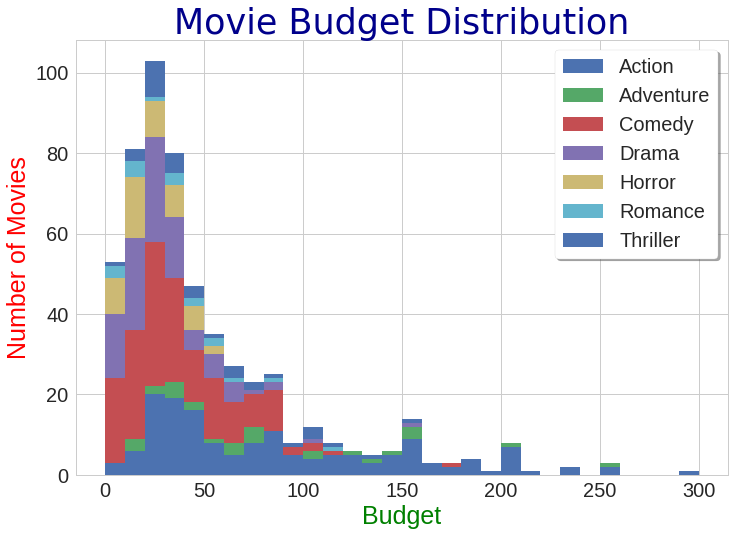

In [78]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8,27)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35, \
         color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies", fontsize = 25, color="Red")
plt.xlabel("Budget", fontsize =25, color = "Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon = True, fancybox = True, shadow = True, framealpha = 1, \
           prop={'size':20})
plt.show()